# Data science exercise - Qi Chu

In [1]:
### import related package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import os

In [2]:
data = pd.read_csv(r'green_tripdata_2016-12.csv')

## 1.Data Quality

There are 1,048,575 observations and 19 variables in the imported data set. <br>
There are 32 duplicated record within it. The field of `ehail_fee` has no value and other fields do not have missing values.

In [3]:
print(len(data))
print(len(data.columns))

1048575
19


In [4]:
data = data.dropna(how='all')
len(data)

1048574

In [5]:
sum(data.duplicated())

32

In [6]:
data = data.drop_duplicates()
len(data)

1048542

In [7]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
1,2.0,12/1/16 0:00,12/1/16 0:06,N,1.0,92.0,192.0,1.0,1.29,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0
2,2.0,12/1/16 0:52,12/1/16 0:54,N,1.0,92.0,171.0,1.0,0.64,4.0,0.5,0.5,1.06,0.0,NaN,0.3,6.36,1.0,1.0
3,2.0,12/1/16 0:10,12/1/16 0:14,N,1.0,75.0,238.0,2.0,0.89,5.5,0.5,0.5,1.70,0.0,NaN,0.3,8.50,1.0,1.0
4,2.0,12/1/16 0:12,12/1/16 0:15,N,1.0,166.0,151.0,1.0,0.66,4.5,0.5,0.5,1.74,0.0,NaN,0.3,7.54,1.0,1.0
5,2.0,12/1/16 0:29,12/1/16 0:39,N,1.0,166.0,42.0,1.0,2.15,9.5,0.5,0.5,2.16,0.0,NaN,0.3,12.96,1.0,1.0


In [8]:
# number of unique values within each field
data.nunique()

VendorID                     2
lpep_pickup_datetime     37357
lpep_dropoff_datetime    37485
store_and_fwd_flag           2
RatecodeID                   6
PULocationID               239
DOLocationID               260
passenger_count             10
trip_distance             2975
fare_amount                820
extra                        9
mta_tax                      3
tip_amount                1777
tolls_amount               113
ehail_fee                    0
improvement_surcharge        3
total_amount              5574
payment_type                 5
trip_type                    2
dtype: int64

In [9]:
# Basic Statistic of each field
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VendorID,1048542.0,1.799032,0.400724,1.00,2.00,2.0,2.00,2.00
RatecodeID,1048542.0,1.085169,0.565989,1.00,1.00,1.0,1.00,6.00
PULocationID,1048542.0,113.442571,76.278443,1.00,49.00,83.0,173.00,265.00
DOLocationID,1048542.0,129.290820,77.163537,1.00,61.00,129.0,193.00,265.00
passenger_count,1048542.0,1.362153,1.037782,0.00,1.00,1.0,1.00,9.00
trip_distance,1048542.0,2.624623,2.818996,0.00,0.98,1.7,3.20,147.50
fare_amount,1048542.0,11.669026,9.847180,-499.00,6.00,9.0,14.00,700.00
extra,1048542.0,0.358869,0.390185,-4.50,0.00,0.5,0.50,4.50
mta_tax,1048542.0,0.487279,0.085050,-0.50,0.50,0.5,0.50,0.50
tip_amount,1048542.0,1.158554,2.240871,-10.56,0.00,0.0,1.89,250.70


Based on the above statistic summary of each field, some of the numbers draws my attention:
- maximum trip_distance - 147.50 miles ? this is really high
- minimum trip_distance - 0 miles ? 
- some amounts have negative value (fare_amount,extra,mta_tax,tip_amount,tolls_amount).What does negative amount mean here ?  will need to dive deeper to see the proportion of negative amount.
- some amounts are really higher - maximum fare_amount of 700.00

Overall speaking, this is a decent dataset with good amount of records and not many missing values, but data cleaning is definitely require to avoid noise and perform analysis.

In [10]:
zone = pd.read_csv('taxi+_zone_lookup.csv')
total_data = pd.merge(data, zone[['LocationID','Borough','service_zone']],left_on= "DOLocationID", right_on = "LocationID")

### Data Cleaning
Based on the above findings of some abnormal data points, I first performed the data cleaning. I also add several derived fields for future analysis.

In [12]:
# Convert certain datatypes and derived several new fields
total_data["hour"] = pd.to_datetime(total_data.lpep_pickup_datetime).dt.hour

In [13]:
total_data['weekday'] = pd.to_datetime(total_data.lpep_pickup_datetime).dt.dayofweek
total_data['weekend'] = np.where(total_data['weekday'] >4,1,0)

In [14]:
total_data['duration'] = pd.to_datetime(total_data.lpep_dropoff_datetime) - pd.to_datetime(total_data.lpep_pickup_datetime)
total_data['mins'] = round(total_data['duration'].dt.seconds/60,2)
total_data['speed_mph'] = total_data['trip_distance']/(total_data['mins']/60)
total_data['additional_fee'] = total_data['extra']+ total_data['mta_tax']+ total_data['improvement_surcharge']

In [15]:
clean_data = total_data.copy()
#exclude records with implausible distance
clean_data = clean_data[(clean_data['trip_distance'] > 0.0) & (clean_data['trip_distance'] <=100.0)]
#exclude records with implausible fare amount, initial charge of NYC green taxi is $2.5
clean_data = clean_data[(clean_data['fare_amount'] >= 2.5) & (clean_data['fare_amount'] <= 250)]
#exclude records with implausible speed
clean_data = clean_data[(clean_data['speed_mph'] >= 1) & (clean_data['speed_mph'] <= 200)]
#exclude records with implausible duration
clean_data = clean_data[(clean_data['mins'] > 0) & (clean_data['mins'] <= 120)]

In [16]:
# number of records after removing certain data anomolies
len(clean_data)

1018617

## 2.Data Exploratory and Visualization
### Categorical Variable

- **VendorID**
    - A code indicating the LPEP provider that provided the record.
    - Categorical variable (2 classes, 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.)
    - VeriFone provide 80% record
    
- **passenger_count**
    - The number of passengers in the vehicle (driver-entered value)
    - Discrete value
    - The accuracy of this field worth consideration

- **PULocationID/DOLocationID**
    - TLC Taxi Zone in which the taximeter was engaged/disengaged
    - Categorical variable, but have lots of classes
    - There are more pickups in some area than others. Area 74&41 have high pickups and area 71&42 have high dropoffs. There is another csv contains details location information of each area code, more exploration could be done with this field.
    
- **RatecodeID**
    - The final rate code in effect at the end of the trip.
    - Categorical variable (6 classes)
    - 99% are standard rate. 
- **store_and_fwd_flag**
    - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server
    - Categorical variable , The above bar chart shows that over 99% are ‘N’.
    
- **payment_type**
    - A numeric code signifying how the passenger paid for the trip.
    - Categorical variable (6 classes, Credit card, Cash, No charge, Dispute, Unknown, Voided trip).

- **trip_type**
    - A code indicating whether the trip was a street-hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.
    - Categorical variable (2 classes, Street-hail, Dispatch).

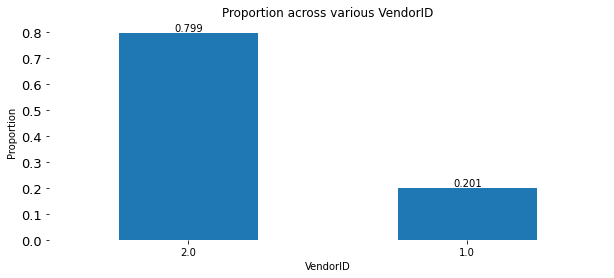

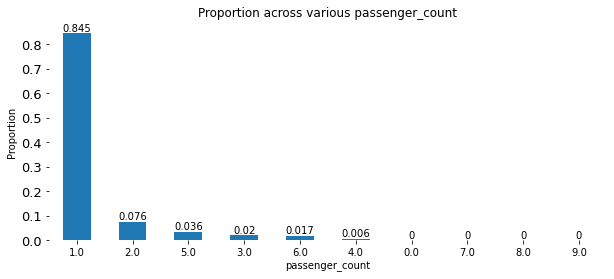

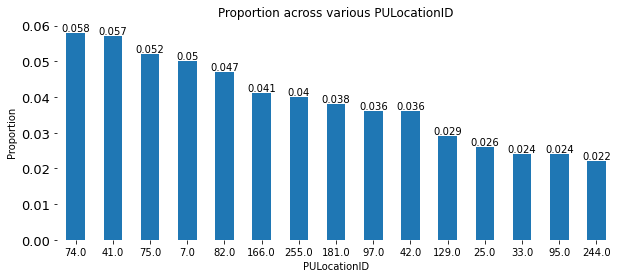

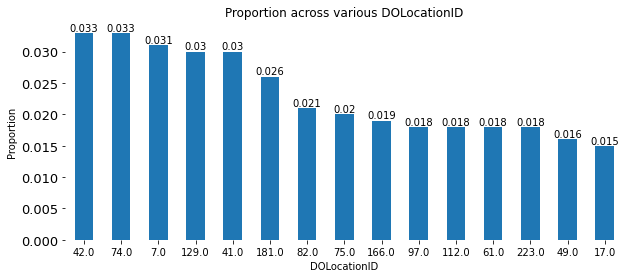

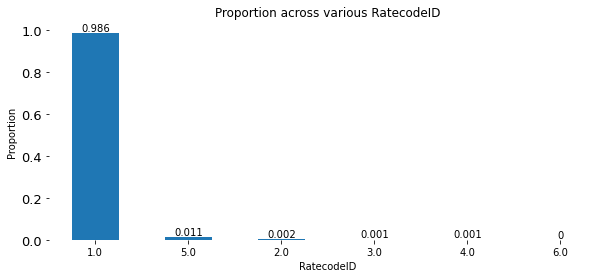

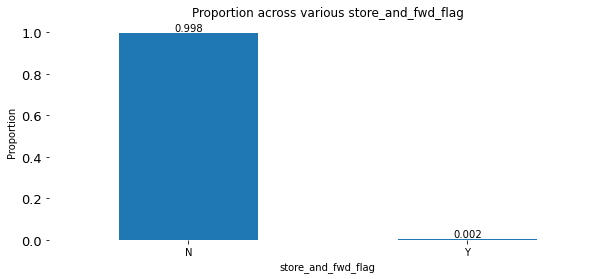

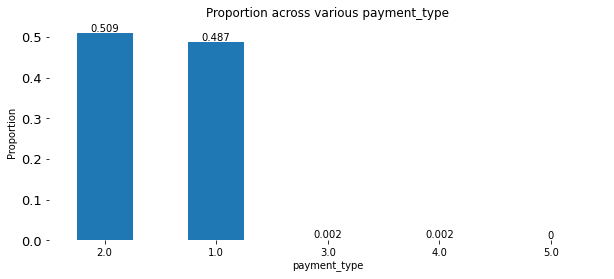

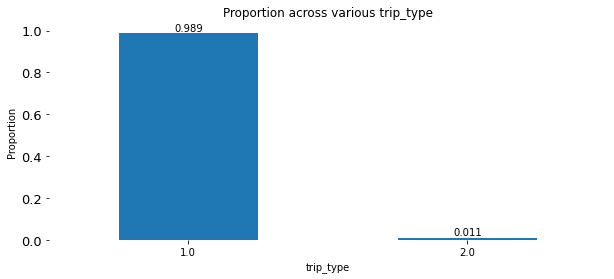

In [17]:
import seaborn as sns
categorical = ['VendorID','passenger_count','PULocationID','DOLocationID','RatecodeID','store_and_fwd_flag','payment_type','trip_type']

for i in categorical:
    fig, ax = plt.subplots(1,1, figsize=(10, 4))
    subset = round(clean_data.groupby(i)['VendorID'].count()/len(clean_data),3)
    subset = subset.sort_values(ascending = False).head(15)
    ax = subset.plot(kind='bar', title='Proportion across various '+i, xlabel=i)
    ax.bar_label(ax.containers[0], label_type='edge')
    #plt.xlabel('Category of '+i , fontsize=13)
    plt.xticks(rotation = 360)
    plt.ylabel('Proportion')
    plt.yticks(fontsize=13)
    plt.box(False)

### Continuous Variable

- **lpep_pickup_datetime /lpep_dropoff_datetime**
    - The date and time when the meter was engaged/disengaged
    - could derive features based on it, ex: hours of the day, weekday vs weekend, trip duration, daytime vs nighttime etc


- **trip_distance**
    - The elapsed trip distance in miles reported by the taximeter.
    - maybe a good feature to add to the the model for tipPercentage prediction

- **fare_amount**
    - The time-and-distance fare calculated by the meter.
    - Continuous variable.
- **extra**
    - Miscellaneous extras and surchages. Currently, this only includes the `$0.50` and `$1` rush hour and overnight charges.
    - Continuous variable.

- **mta_tax**
    - $0.50 MTA tax that is automatically triggered based on the metered rate in use.


- **tip_amount**
    - This field is automatically populated for credit card tips. Cash tips are not included.
    - Continuous variable.

- **improvement_surchage**
    - $0.30 improvement surchage assessed on hailed trips at the flag drop.
 
- **total_amount**
    - The total amount charged to passengers. Does not include cash tips.
    - total_amount = fare_amount + extra + mta_tax + tolls_amount + tip_amount + improvement_surcharge
    - Continuous variable.


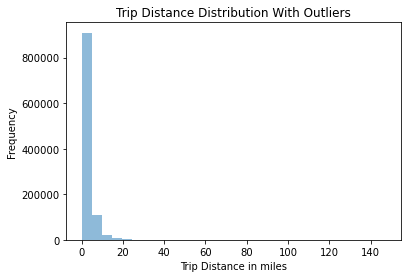

In [18]:
#histogram of Trip Distance
figsize=(30, 10)
data.trip_distance.plot.hist(bins = 30,alpha=0.5)
plt.title("Trip Distance Distribution With Outliers")
plt.xlabel("Trip Distance in miles")
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_distance'>

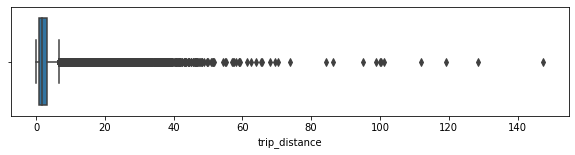

In [19]:
plt.figure(figsize=[10,2])
sns.boxplot(data['trip_distance'])

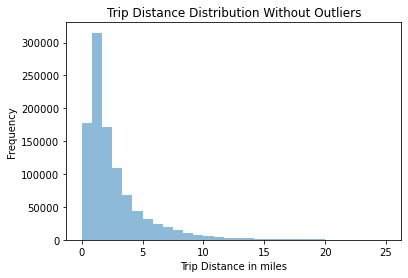

In [20]:
figsize=(30, 10)
clean_data.trip_distance.plot.hist(bins = 30,alpha=0.5,range = [0,25])
plt.title("Trip Distance Distribution Without Outliers")
plt.xlabel("Trip Distance in miles")
plt.show()

Based on the first histogram we can see that the distribution is right skewed. Based on the boxplot, it is evident that there are many outliers in the distance field of the dataset. <br>
When only looking at range between 0 and 25 miles, we could see that distance travelled by the green taxis is mostly short distance trips between 0 to 5 miles.

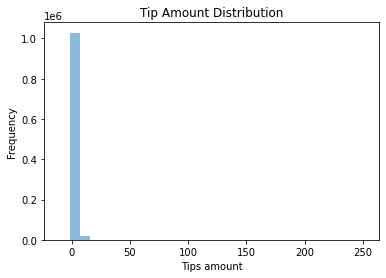

In [21]:
figsize=(30, 10)
data.tip_amount.plot.hist(bins = 30,alpha=0.5)
plt.title("Tip Amount Distribution")
plt.xlabel("Tips amount")
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip_amount'>

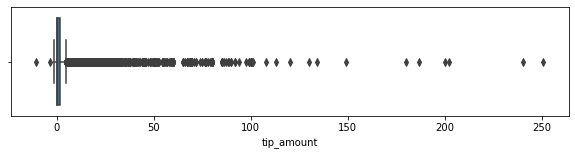

In [22]:
plt.figure(figsize=[10,2])
sns.boxplot(data['tip_amount'])

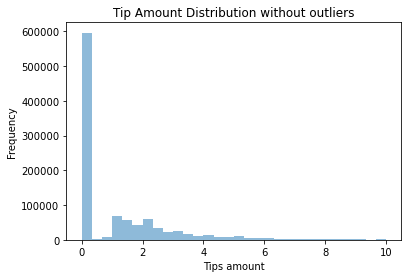

In [23]:
figsize=(30, 10)
clean_data.tip_amount.plot.hist(bins = 30,alpha=0.5, range = [0,10])
plt.title("Tip Amount Distribution without outliers")
plt.xlabel("Tips amount")
plt.show()

Based on the first histogram we can see that the distribution of tip amount is right skewed. Based on the boxplot, it is evident that there are many outliers in the tip-amount field of the dataset. <br>
When only looking at amount between `$0` and `$10`, we could see that tip_amoun is mostly within `[$0 - $5]` range.

## 3. Find interesting trip statistics grouped by hour

Text(0, 0.5, 'Number of Trips')

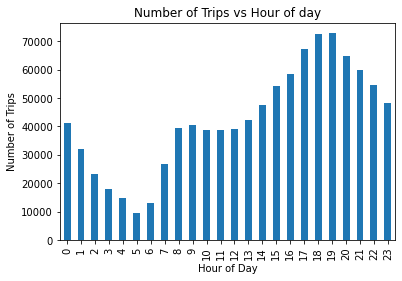

In [24]:
clean_data.groupby('hour')['VendorID'].count().plot(kind='bar')
plt.title("Number of Trips vs Hour of day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")

Text(0, 0.5, 'Median Trip Distance (miles)')

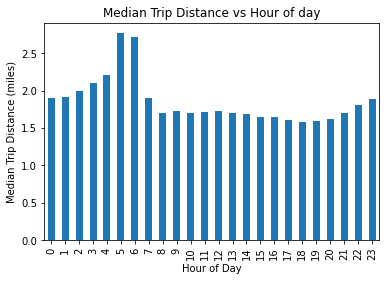

In [25]:
# median trip distance per hour of day
clean_data.groupby('hour')['trip_distance'].median().plot(kind='bar')
plt.title("Median Trip Distance vs Hour of day")
plt.xlabel("Hour of Day")
plt.ylabel("Median Trip Distance (miles)")

Text(0, 0.5, 'Median Tip amount Distance (miles)')

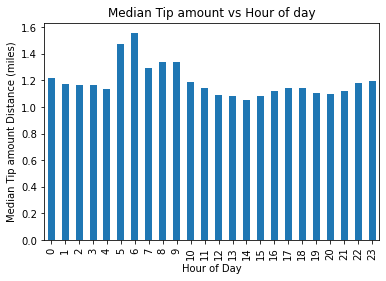

In [26]:
# median trip distance per hour of day
clean_data.groupby('hour')['tip_amount'].mean().plot(kind='bar')
plt.title("Median Tip amount vs Hour of day")
plt.xlabel("Hour of Day")
plt.ylabel("Median Tip amount Distance (miles)")

### Findings

From the above graph we can say that 
- Based on the number of trips across hours of the day, Green Taxis cover more trips during day time compared with late night hours. Majority of the trips happens between 8am - 20pm,this is the timeframe when most people commute to work, travel in the city during the day and commute back home after work.  Several reasons to explain less trips during late night hours maybe : 
    - less demand during night hours 
    - less Green Taxi driver available during night hours 
    - people prefer uber/lyft etc. regarding safety concerns
- Median trip distance reaches the highest during the morning hours (5,6am). People usually get up early to travel long distance in green taxis for work or going to airport etc.
- Median tip amount also reaches the highest during the morning hours (5,6am). Maybe there is a decent relation between trip distance and tip amount and we could consider add to the model.


## 4. The taxi drivers want to know what kind of trip yields better tips. Can you build a model for them and explain the model?

Better tips not only means higher tip amount, but also relatively higher proportion when compared with total_fee of a trip. Therefore, I derived the tip_percentage variable as `tip_amount * 100 /total_amount` and use it as the response variable of the model. <br>
Since the response variable is continuous, I will build a Multivariable linear regression model to solve this problem.<br>
Since the tip of cash payment is not included (unknown) in this dataset, I will remove those records with a payment code of 2. The total data records available for prediction model is 500,402


In [30]:
clean_data['tip_p'] = clean_data['tip_amount']*100/clean_data['total_amount']

In [31]:
inputdata = clean_data.copy()
inputdata = inputdata[(inputdata['payment_type'] != 2)]

In [32]:
len(inputdata)

500402

For this tip_amount prediction model, all features in the dataset were considered candidate features for the model, except for `total_amount` and `tip_amount` since the response variable is derived based on them
- `ehail_fee` contains null values for all records and `store_and_fwd_flag` is irrelevant to tip percentage,therefore removed from the input data

In [33]:
inputdata.drop(columns=['store_and_fwd_flag', 'ehail_fee'],inplace = True)

In [34]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(inputdata,test_size=0.3)

In [35]:
## create a correlation matrix based on selected columns to avoid multicollinearity
inputdata[['fare_amount','trip_distance','tolls_amount','passenger_count','speed_mph']].corr().style.background_gradient(cmap='coolwarm')

,fare_amount,trip_distance,tolls_amount,passenger_count,speed_mph
fare_amount,1.000000,0.942113,0.338407,0.003868,0.352350
trip_distance,0.942113,1.000000,0.360400,0.003339,0.510952
tolls_amount,0.338407,0.360400,1.000000,-0.002029,0.193325
passenger_count,0.003868,0.003339,-0.002029,1.000000,0.000549
speed_mph,0.352350,0.510952,0.193325,0.000549,1.000000


In [36]:
from statsmodels.formula.api import ols
lm = ols('tip_p ~ C(VendorID) + C(payment_type) +fare_amount + C(RatecodeID)+ C(Borough) + tolls_amount + speed_mph + C(weekend)+ passenger_count', data=train).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tip_p   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     1066.
Date:                Sun, 01 May 2022   Prob (F-statistic):               0.00
Time:                        22:54:34   Log-Likelihood:            -1.1863e+06
No. Observations:              350281   AIC:                         2.373e+06
Df Residuals:                  350260   BIC:                         2.373e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       9.9039      0.079    124.717      0.000       9.748      10.059
C(VendorID)[T.2.0]             -0.2703      0.031     -8.784      0.000      -0.331      -0.210
C(payment_type)[T.3.0]        -14.2918      0.184    -77.824      0.000     -14.652     -13.932
C(payment_type)[T.4.0]        -13.9645      0.205    -68.282      0.000     -14.365     -13.564
C(payment_type)[T.5.0]        -14.2135      1.329    -10.694      0.000     -16.819     -11.608
C(RatecodeID)[T.2.0]            1.3410      0.237      5.659      0.000       0.877       1.806
C(RatecodeID)[T.3.0]           -2.1932      0.584     -3.752      0.000      -3.339      -1.048
C(RatecodeID)[T.4.0]           -0.6502      0.538     -1.208      0.227      -1.705       0.405
C(RatecodeID)[T.5.0]           -5.1099      0.157    -32.617      0.000      -5.417      -4.803
C(RatecodeID)[T.6.0]            4.3930      7.158      0.614      0.539      -9.637      18.423
C(Borough)[T.Brooklyn]          5.5631      0.071     78.811      0.000       5.425       5.701
C(Borough)[T.EWR]               7.9425      0.588     13.517      0.000       6.791       9.094
C(Borough)[T.Manhattan]         4.3814      0.070     62.677      0.000       4.244       4.518
C(Borough)[T.Queens]            4.7581      0.072     66.191      0.000       4.617       4.899
C(Borough)[T.Staten Island]     2.2439      0.653      3.439      0.001       0.965       3.523
C(Borough)[T.Unknown]           3.9069      0.275     14.196      0.000       3.367       4.446
C(weekend)[T.1]                 0.2050      0.026      7.820      0.000       0.154       0.256
fare_amount                    -0.0437      0.001    -29.709      0.000      -0.047      -0.041
tolls_amount                    0.0924      0.014      6.504      0.000       0.065       0.120
speed_mph                       0.0090      0.002      4.085      0.000       0.005       0.013
passenger_count                 0.0505      0.012      4.335      0.000       0.028       0.073
==============================================================================
Omnibus:                    32380.137   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           192903.886
Skew:                          -0.236   Prob(JB):                         0.00
Kurtosis:                       6.605   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
from statsmodels.tools.eval_measures import rmse
predict_y =  lm.predict(test.iloc[: , :-1])
rmse = rmse(test['tip_p'], predict_y)
print(rmse)

7.205656858718702


I choose the above model as the final model for tip percentage prediction after going through a series of feature selections. I only include a subset of all available features to achieve a good balance between explanatory power and model simplicity.<br>
Based on the above model summary, we can see that almost all variables are statistically significant. The p value of the model is also small and we could reject the null hypothesis and declear that this model is statistically significant. <br>
The train test ratio is 7:3 and the model achieved a r2 of 5.7% and RMSE of 7 (meaning on average the predicted tip percentage will be ±7% of the actual percentage)<br>
Based on the coefficient of variables, there are several characteristic of trips could generate higher tip percentage:
- shorter distance/less fare_amount
- more passengers
- relatively higher speed_mph
- picked up within Borough of Brooklyn or Newark Airport
- happened during the weekend
- more passengers
- higher toll fee
- have Creative Mobile Technologies meter


## 5. Find an anomaly in the data and explain your findings.

Some of the anomalies within the dataset I have already talked about during the data cleaning phase.
for example : extremely long duration trip, high total-amount, some negative fee amount etc

One additional anomaly that I find on top of it is that: for green taxis (also known as Boro taxis), theoretically they are only allowed to pick up customers in outer boroughs (excluding John F. Kennedy International Airport and LaGuardia Airport unless arranged in advance) and in Manhattan above East 96th and West 110th Streets. Everywhere else is for “Yellow Taxis”. Also, Green taxis can drop passengers off anywhere, but can’t pick people from the yellow zones. <BR>

However when I looked at the dataset, there are records that indicates pick-up locations within Yellow Zone and that accounts for of `23.9%` of the cleaned dataset.


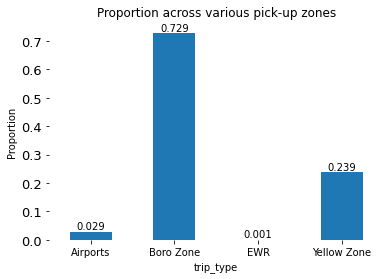

In [39]:
subset = round(inputdata.groupby('service_zone')['VendorID'].count()/len(inputdata),3)
ax = subset.plot(kind='bar', title='Proportion across various pick-up zones', xlabel=i)
ax.bar_label(ax.containers[0], label_type='edge')
#plt.xlabel('Category of '+i , fontsize=13)
plt.xticks(rotation = 360)
plt.ylabel('Proportion')
plt.yticks(fontsize=13)
plt.box(False)

It is probably because when Green taxi drivers drop passengers around lower manhattan, they probably want to pick up someone to go back up north and earn money instead of directly driving back to green zone.

## 6. Limitations and future directions
- The Multivariable regression model does not achieve a satisfactory performance as measured by R2 and RMSE.Therefore, this model is not recommended to handle predictive tasks. However, beta coefficients could help educate taxi drivers and gain more tips.
- Some extreme values disrupt the distribution. As I showed in the histogram of tip amount, a great proportion of passengers pay $0 tips. These 0 values greatly contribute to prediction errors and maybe driven by data quality issue - for example: tips paid in cash are not recorded 
- In this study I only leveraged the data of December 2016. Hence seasonality effects are not taken into consideration. At the same time, other information that are helpful for tip prediction is missing for example :demographic information about the passenger, past tipping history of the passenger, driver's rating, car condition etc